In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv('./magic04.data', names=cols)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

So luong phan tu trong tap du lieu: 19020
So luong nhan can du doan: 2
Nhan can du doan: ['g' 'h']

So luong phan tu mang nhan g: 12332
So luong phan tu mang nhan h: 6688



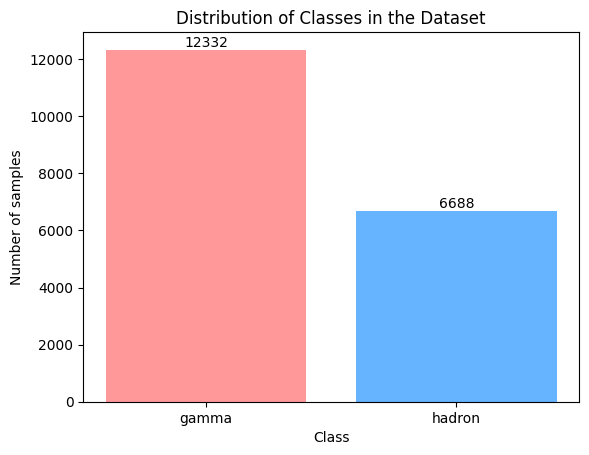

In [4]:
gamma = np.sum(y == 'g')
hadron = np.sum(y == 'h')

print('So luong phan tu trong tap du lieu:', len(y))
print('So luong nhan can du doan:', len(np.unique(y)))
print('Nhan can du doan:', np.unique(y))
print()
print('So luong phan tu mang nhan g:', gamma)
print('So luong phan tu mang nhan h:', hadron)
print()

labels = ['gamma', 'hadron']
sizes = [gamma, hadron]
colors = ['#ff9999','#66b3ff']

plt.bar(labels, sizes, color=colors)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of samples')
for i, v in enumerate(sizes):
    plt.text(i, v + 100, str(v), ha='center')
plt.show()

In [5]:
y = y.map({'h': 0, 'g': 1})

In [ ]:
for i in range(len(y.unique())):
    print(f'Du lieu mau cua nhan {i}:')
    print(X[y == i].head())

In [27]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [23]:
print('So luong phan tu trong tap du lieu huan luyen:', len(y_train))
print('So luong phan tu trong tap du lieu kiem tra:', len(y_test))
print()



So luong phan tu trong tap du lieu huan luyen: 13314
So luong phan tu trong tap du lieu kiem tra: 5706



Do chinh xac cua Decision Tree


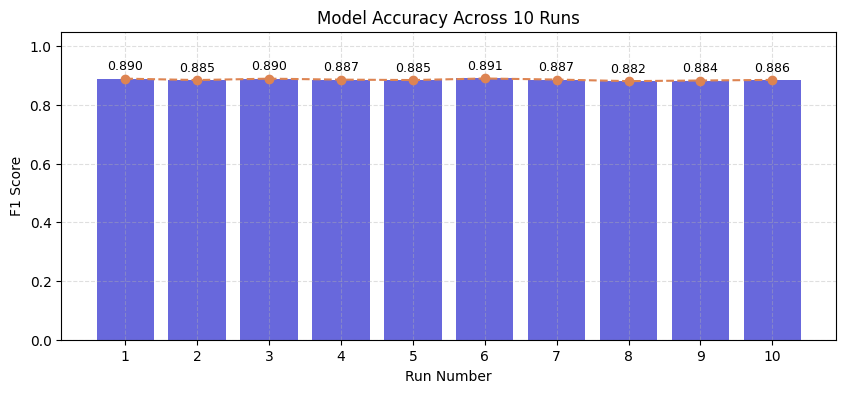

In [73]:
param_tuples = [
    # (max_depth, min_samples_split, min_samples_leaf)
    (8, 5, 1),
    (12, 10, 5),
    (8, 20, 10),
    (10, 50, 25),
    (12, 50, 25),
    (8, 10, 3),
    (10, 20, 5),
    (15, 50, 10),
    (12, 20, 10),
    (12, 10, 5)
]

f1s = []
print('Do chinh xac cua Decision Tree')

for i, (max_depth, min_samples_split, min_samples_leaf) in enumerate(param_tuples, 1):
    model_DT = DecisionTreeClassifier(
        criterion='gini', 
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    model_DT.fit(X_train, y_train)
    y_pred_DT = model_DT.predict(X_test)

    f1_DT = f1_score(y_test, y_pred_DT)
    f1s.append(f1_DT)
    # print(f'Lan {i}: {100 * f1_DT:.2f} %')
    # print()

runs = list(range(1, len(f1s) + 1))
plt.figure(figsize=(10, 4))
plt.bar(runs, f1s, color="#0404C5", alpha=0.6, label='Accuracy (bar)')
plt.plot(runs, f1s, marker='o', linestyle='--', linewidth=1.5, color="#DD8452")
for i, acc in enumerate(f1s):
    plt.text(runs[i], f1s[i] + 0.03, f"{acc:.3f}", ha='center', fontsize=9)
plt.xticks(runs)
plt.ylim(0, 1.05)
plt.xlabel("Run Number")
plt.ylabel("F1 Score")
plt.title("Model Accuracy Across 10 Runs")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

[[1337  659]
 [ 477 3233]]


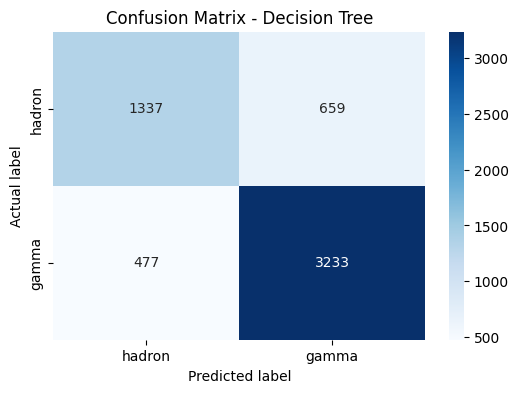

In [36]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
print(cm_DT)

plt.figure(figsize=(6,4))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

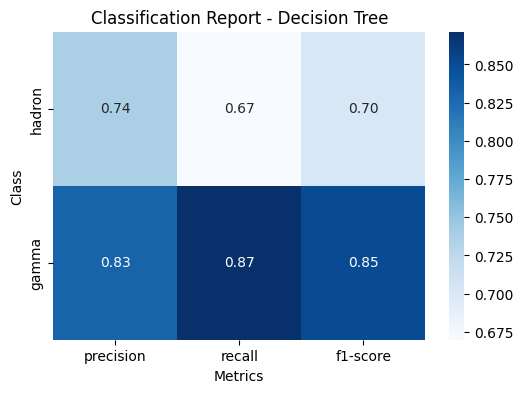

In [45]:
report = classification_report(y_test, y_pred_DT, target_names=['hadron', 'gamma'], output_dict=True)
df = pd.DataFrame(report).transpose()
df = df[df.index.isin(['hadron', 'gamma'])][['precision', 'recall', 'f1-score']]

plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report - Decision Tree")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

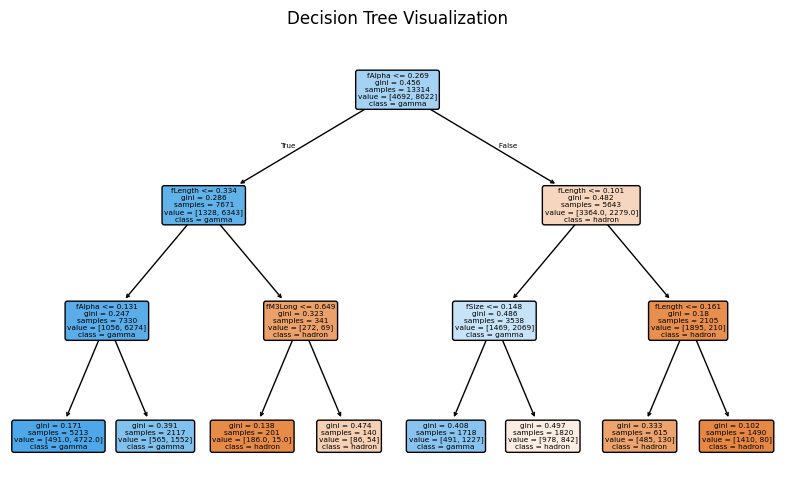

In [42]:
plt.figure(figsize=(10, 6))
plot_tree(model_DT, feature_names=cols[:-1], class_names=['hadron', 'gamma'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [16]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f"Độ chính xác của KNN: {100 * accuracy_KNN:.2f} %")

Độ chính xác của KNN: 83.23 %


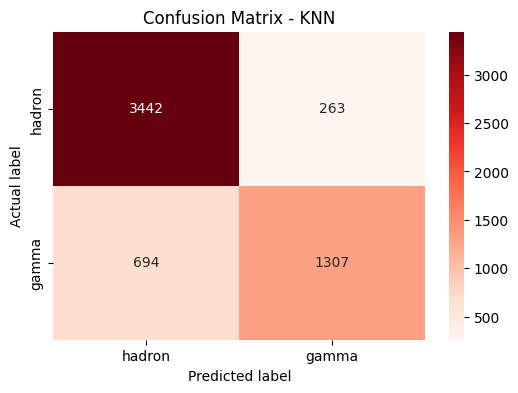

In [18]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

plt.figure(figsize=(6,4))
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Reds', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - KNN')
plt.show()

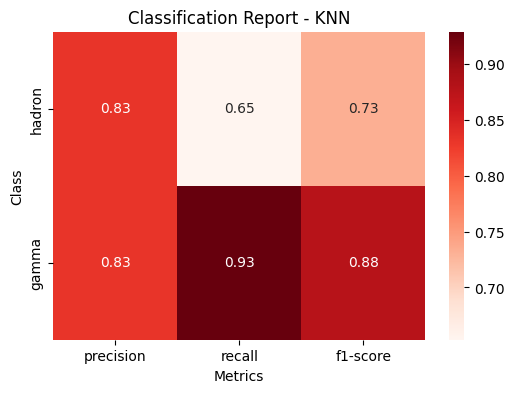

In [14]:
report = classification_report(y_test, y_pred_KNN, target_names=['hadron', 'gamma'], output_dict=True)
df = pd.DataFrame(report).transpose()
df = df[df.index.isin(['hadron', 'gamma'])][['precision', 'recall', 'f1-score']]

plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='Reds', fmt=".2f")
plt.title("Classification Report - KNN")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

In [22]:
nodel_NB = GaussianNB()
nodel_NB.fit(X_train, y_train)
y_pred_NB = nodel_NB.predict(X_test)

accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f"Độ chính xác của Naive Bayes: {100 * accuracy_NB:.2f} %")

Độ chính xác của Naive Bayes: 72.75 %


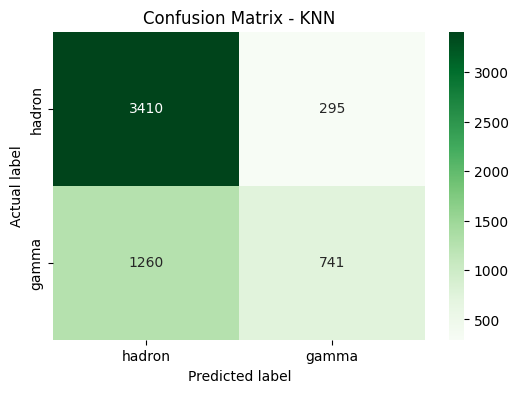

In [25]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

plt.figure(figsize=(6,4))
sns.heatmap(cm_NB, annot=True, fmt='d', cmap='Greens', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - KNN')
plt.show()